# Exploring Data

## Setup

This file will contain a number of small visualizations and examples to explore the data. This first section will contain the code to setup the following visualizations.

In [2]:
# importing libraries

import os
import pandas as pd
import glob

import matplotlib.pyplot as plt

In [9]:
# loading data and showing first 3 rows

data_folder = "../data/raw/"
file = data_folder + "all_songs_data_processed.csv"

# concat all csvs into one dataframe
df_list = [pd.read_csv(file)]
df = pd.concat(df_list, ignore_index=True)
# see first row
df.tail(0)

,Album,Album URL,Artist,Featured Artists,Lyrics,Media,Rank,Release Date,Song Title,Song URL,Writers,Year,Verbs,Nouns,Adverbs,Corpus,Word Counts,Unique Word Counts


In [10]:
import re

# List of known bands with "and" or "&" in their name
known_band_names = ["Florence and the Machine", "Earth, Wind & Fire", "Simon & Garfunkel"]

def preprocess_artists(df):
    """
    Preprocess the Artist and Featured Artists columns in the dataframe.

    Args:
        df (pd.DataFrame): Input dataframe with 'Artist' and 'Featured Artists' columns.

    Returns:
        pd.DataFrame: Updated dataframe with cleaned 'Artist' and 'Featured Artists' columns.
    """
    def clean_artist_feature(row):
        artist = row['Artist']
        features = row['Featured Artists']

        # Check if the artist is a known band, if so, leave it as-is
        if artist in known_band_names:
            return artist, features

        # Regular expression to extract features and standardize artist names
        pattern = r'(?i)(?:\s*[&and]+\s*|\s*feat(?:uring)?\.?\s*)'
        parts = re.split(pattern, artist)

        # If there are more than one part, it implies there are featured artists
        if len(parts) > 1:
            main_artist = parts[0].strip()  # The first part is the main artist
            extracted_features = [p.strip() for p in parts[1:] if p.strip()]
            # Merge with existing featured artists
            if isinstance(features, str) and features.strip():
                all_features = extracted_features + eval(features)
            else:
                all_features = extracted_features
            return main_artist, all_features
        else:
            # No splitting, return the artist as is
            return artist.strip(), features

    # Apply the cleaning function to each row in the dataframe
    df[['Artist', 'Featured Artists']] = df.apply(
        lambda row: clean_artist_feature(row), axis=1, result_type="expand"
    )

    # Normalize featured artists into string format for easier analysis later
    df['Featured Artists'] = df['Featured Artists'].apply(lambda x: x if isinstance(x, list) else [])

    return df



The above row shows us the features of the dataset. The dataset consists of the following features: Album, Album URL, Artist, Featured Artists, Lyrics, Media, Rank (on the charts), Release Date, Song Title, Song URL, Writers, Year, Verbs, Nouns, Adverbs, Corpus, Word Counts and Unique Word Counts. The features we intend to drop would be anything that is not a number, a date, or plaintext. This would include: Album URL, Media, Song URL and Writers. The lyrics feature may be superfluous. The date feature will have to be removed as obviously that would gift the model the answer and make the project useless. We will use the year feature as the target variable.

## Visualizing length of songs by words.

The following will be a visualization of the songs by the length of the lyrics.

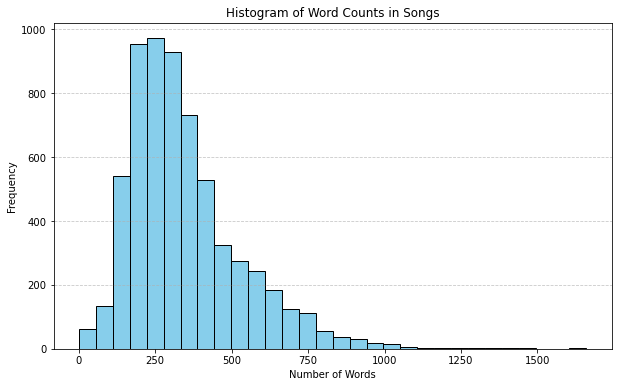

In [4]:
df['word_count'] = df['Lyrics'].apply(lambda lyrics: len(str(lyrics).split()))

plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Word Counts in Songs')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


The above graph shows a right skewed distribution, that peaks at roughly 250 words, with about 950 instances that fall into this bucket.

## Visualizing Length of Songs by Unique Words

The following will be a similar visualization to the last one, but using unique words instead.

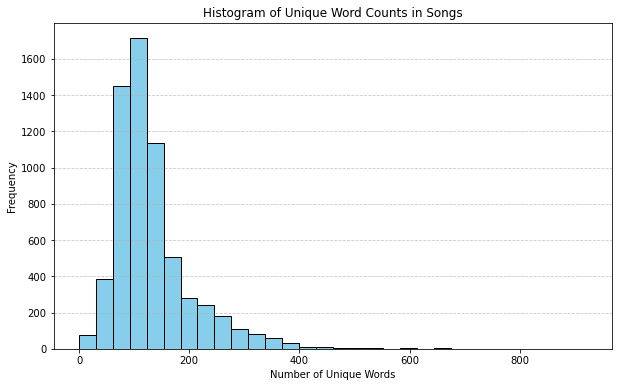

In [5]:
plt.figure(figsize=(10, 6))
plt.hist(df['Unique Word Counts'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Unique Word Counts in Songs')
plt.xlabel('Number of Unique Words')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The distribution is again right skewed, but peaks at roughly 100 this time, with a frequency of about 1700. The increase and decrease from this peak is sharper. This and the last visualization show that most songs have roughly the same amount of unique words, but repetition of these words exacerbates any differences.

## Visualizing Songs by Amount of Repetition

The following will be a histogram that will visualize the amount of repetition by dividing the amount of words by the number of unique words.

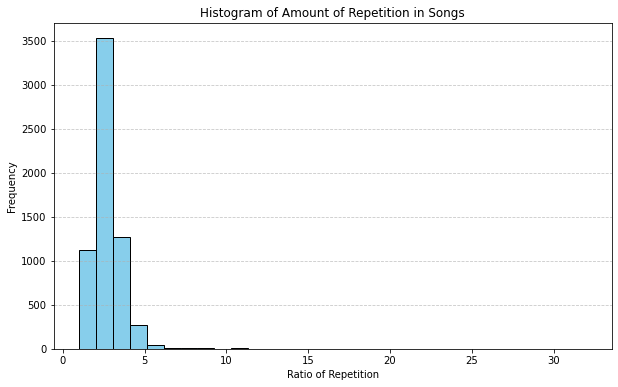

In [6]:
plt.figure(figsize=(10, 6))
plt.hist(df['Word Counts'] / df['Unique Word Counts'], bins=30, color='skyblue', edgecolor='black')
plt.title('Histogram of Amount of Repetition in Songs')
plt.xlabel('Ratio of Repetition')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The above graph shows that the ration of repetition hovers almost always between 1 and 5. The most common ratio of repetition is roughly 2. This means that each word is repeated roughly twice in most songs in the Top 100.